# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [180]:
from google.colab import drive
drive.mount('/content/drive',  force_remount=True)

Mounted at /content/drive


In [181]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x) # To supress numerical display in scientific notations

### Understanding the structure of the data

In [182]:
# reading data
df = pd.read_csv('/content/drive/MyDrive/PYTHON/Assign_ attempt/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.




### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [228]:
##Shape of our dataset
df.shape

(1898, 11)

#### Observations:

The Dataset contains 1898 Rows and 9 Columns. Rows present the data for all the orders computed.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [184]:
##Summary of the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


1.   There are 5 Numerical datatypes and 4 Object Datatypes. 
2.   No null values can be found as the non-null count amounts to 1898 observations.
3. Rating Column has interesting values to note (eg. Not Given) - Hence, had the wrong data type (object, which we will change)







In [185]:
#Verify entries in the rating column
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [186]:
##Converting 'Not given' to zero 
df['rating']=df['rating'].replace(['Not given'],0)

##converting rating datatype to float
df = df.astype({"rating": float, "order_id": object, "customer_id": object})

##rechecking the data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 133.6+ KB


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [187]:
# Checking for Missing Values in the dataframe
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


1.   There seem to be no missing values in the data. 

Note: Order rating 'Not given' was changed to 0







### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [188]:
# Statistical summary for our dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
rating,1898.00,2.66,2.20,0.00,0.00,4.00,5.00,5.00
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:


1.   Minimum Food Preparation Time = 20.00 Minutes
1.   Average Foood Preparation Time = 27.37 Minutes
2.   Maximum Food Prepartion Time = 35.00 Minutes

Delivery Times

1.   Average Delivery Time = 24.16 Minutes
1.   Minimum Delivery Time = 15.00 Minutes
2.   Maximum Delivery Time = 33.00 Minutes










### **Question 5:** How many orders are not rated? [1 mark]

In [189]:
# Write the code here
df['rating'].value_counts()

0.00    736
5.00    588
4.00    386
3.00    188
Name: rating, dtype: int64

#### Observations:


1.   736 Orders have not been given a rating.('Notgiven' changed to 0)



### Exploratory Data Analysis (EDA)

In [190]:
# check unique order ID
df['order_id'].nunique()  

1898

In [191]:
# check unique customer ID
df['customer_id'].nunique()  

1200

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [192]:
#Check unique Restaurant Names
df['restaurant_name'].nunique()
print('There are',df['restaurant_name'].nunique(), 'unique restaurants in the study.' )

There are 178 unique restaurants in the study.


In [193]:
df['restaurant_name'].value_counts().head(10)

Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Name: restaurant_name, dtype: int64

In [194]:
# check unique Cusisines
df['cuisine_type'].nunique()  
print('The Study considers',df['cuisine_type'].nunique() ,'different cusine types.')

The Study considers 14 different cusine types.


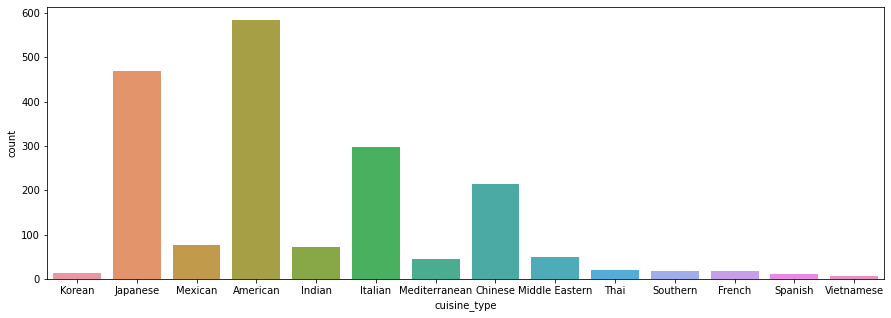

In [195]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type');

**Observations on Cuisine Type** 
1. There are 178 Unique Restaurants
2. There are 14 different cusine types.
3. We can clearly see American, Japanese, Italian and Chinese Cuisine as favourites that were ordered the most. 

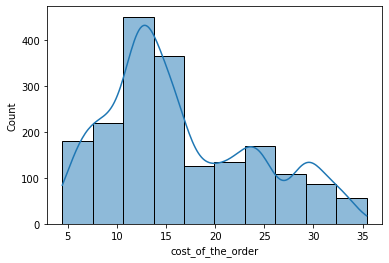

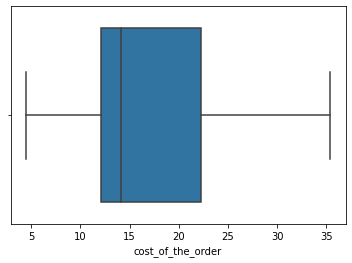

In [196]:
#Cost of Orders
sns.histplot(data=df,x='cost_of_the_order',bins=10,stat='count',kde=True) ## Histogram for the cost of orde 
##Increased bin size to better interpret data
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show() 

**Observations on Cost of Orders**
1. Plot appears multimodal and is positively skewed. 
2. Second peak is around the Q3 of 22.30 USD.
3. Median cost is 14.14 USD. The Orders are spread over the median to the right side is more than on the left. 
4. Interesting to note a correlation that can be drawn based on the target markets, i.e., Students and Working Professionals. 

Orders Depending on the Day of The Week


In [197]:
# # Check the unique values
df['day_of_the_week'].nunique() ## Complete the code to check unique values for the 'day_of_the_week' column

2

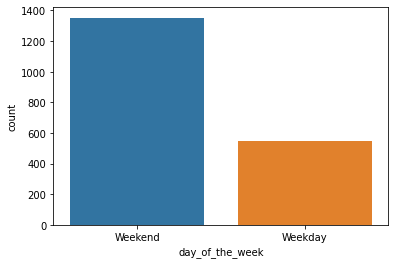

In [198]:
sns.countplot(data = df, x = 'day_of_the_week'); ## Complete the code to plot a bar graph for 'day_of_the_week' column

Observations on day of the week
Weekend orders are higher than weekdays. 

Rating

In [199]:
# # Check unique values for rating 
df['rating'].unique()

array([0., 5., 3., 4.])

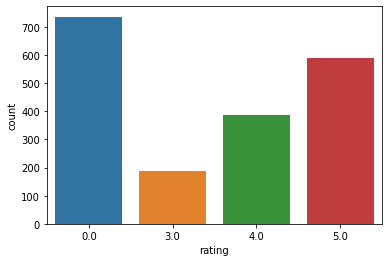

In [200]:
sns.countplot(data = df, x = 'rating'); ## to get a count plot for the rating available

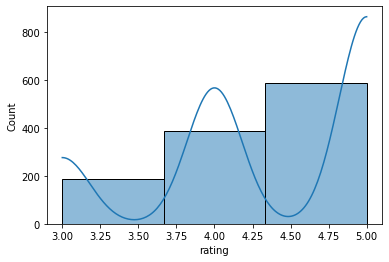

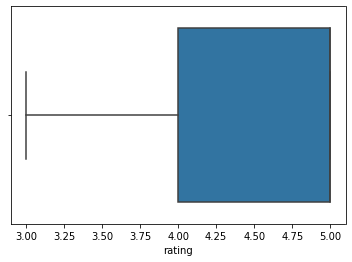

In [201]:
##Remove 0 rating(notgiven rows)
df_notgiven=df[df['rating']!= 0]
               

sns.histplot(data = df_notgiven, x='rating',bins = 3,stat = 'count',kde = True)
plt.show()
sns.boxplot(data = df_notgiven, x='rating')
plt.show();

Observations on the Rating
1. most of the orders are concentrated near the maximum rating. 
2. The boxplot does not display a whisker on the right, implying the distribution is highly negatively skewed. 

Food Preparation Time 

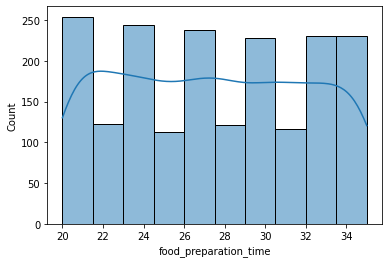

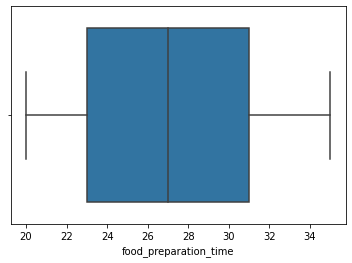

In [202]:
sns.histplot(data=df,x='food_preparation_time',bins=10,stat='count',kde=True) ## Complete the code to plot the histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='food_preparation_time') ## Complete the code to plot the boxplot for the cost of order
plt.show()

Observations on Food Prep Time
1. It takes anywhere between 20 and 36 minutes to prepare an order. 
2. On average, it takes 27 minutes to prepare an order. 

Delivery Time

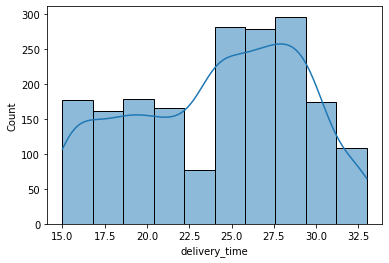

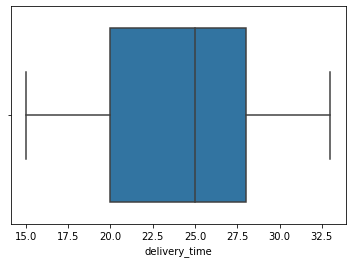

In [203]:
sns.histplot(data=df,x='delivery_time',bins=10,kde=True) ## Complete the code to plot the histogram for the delivery time
plt.show()
sns.boxplot(data=df,x='delivery_time') ## Complete the code to plot the boxplot for the delivery time
plt.show()

Observations on the Delivery Time
1. On Average, delivery takes 25 minutes. 
2. The plot is negatively skewed. 
3. 75% of the orders are delivered between 25 and 28 minutes. 

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [204]:
###The top 5 Restaurants in terms of number of orders received are: 
df['restaurant_name'].value_counts().head(5)


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:


The top 5 Restaurants in terms of number of orders received are: 
1.   Shake Shack - 219 Orders
2.   The Meatball Shop - 132 Orders
3.   Blue Ribbon Sushi - 119 Orders
4.   Blue Ribbon Fried Chicken - 96 Orders
5.   Parm - 68 Orders



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [205]:
# Write the code here 
##OVERALL _WEEKDAY+WEEKEND
df_rating_count = df.groupby(['day_of_the_week','cuisine_type']).count()['order_id']
df_rating_count

day_of_the_week  cuisine_type  
Weekday          American          169
                 Chinese            52
                 French              5
                 Indian             24
                 Italian            91
                 Japanese          135
                 Korean              2
                 Mediterranean      14
                 Mexican            24
                 Middle Eastern     17
                 Southern            6
                 Spanish             1
                 Thai                4
                 Vietnamese          3
Weekend          American          415
                 Chinese           163
                 French             13
                 Indian             49
                 Italian           207
                 Japanese          335
                 Korean             11
                 Mediterranean      32
                 Mexican            53
                 Middle Eastern     32
                 Southern       

In [206]:
#WEEKDAY BREAKDOWN
df_weekday = df[df['day_of_the_week'] == 'Weekday']
df_weekday['cuisine_type'].value_counts() 

American          169
Japanese          135
Italian            91
Chinese            52
Mexican            24
Indian             24
Middle Eastern     17
Mediterranean      14
Southern            6
French              5
Thai                4
Vietnamese          3
Korean              2
Spanish             1
Name: cuisine_type, dtype: int64

In [207]:
#WEEKEND BREAKDOWN
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts() 

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
American Cuisine is the most popular on Weekends, with 415 orders.  
Followed by Japanese (335 orders), Italian(207 orders) and Chinese(163 orders). 

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [208]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] ## Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


#### Observations:
29.24 % of all orders cost more than 20 USD. 

### **Question 10**: What is the mean order delivery time? [1 mark]

In [209]:
# Write the code her Get the mean delivery time
mean_del_time = df['delivery_time'].mean()  ## Write the appropriate function to obtain the mean delivery time

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes.')
# Write the code her Get the mean delivery time
max_del_time = df['delivery_time'].max()  ## Write the appropriate function to obtain the mean delivery time

print('The maximum delivery time for this dataset is', round(max_del_time, 2), 'minutes.')


The mean delivery time for this dataset is 24.16 minutes.
The maximum delivery time for this dataset is 33 minutes.


#### Observations:

The mean delivery time for this dataset is 24.16 minutes.

The maximum delivery time for this dataset is 33 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [210]:
# Get the counts of  each customer_id

df[['order_id','customer_id']].groupby('customer_id').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(5)

,order_id
customer_id,
52832,13
47440,10
83287,9
250494,8
65009,7


#### Observations:
Top 3 Order ID's


1.   52832 - #13 orders
2.   47440 - #10 orders
3.   83287 - #9 orders




### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


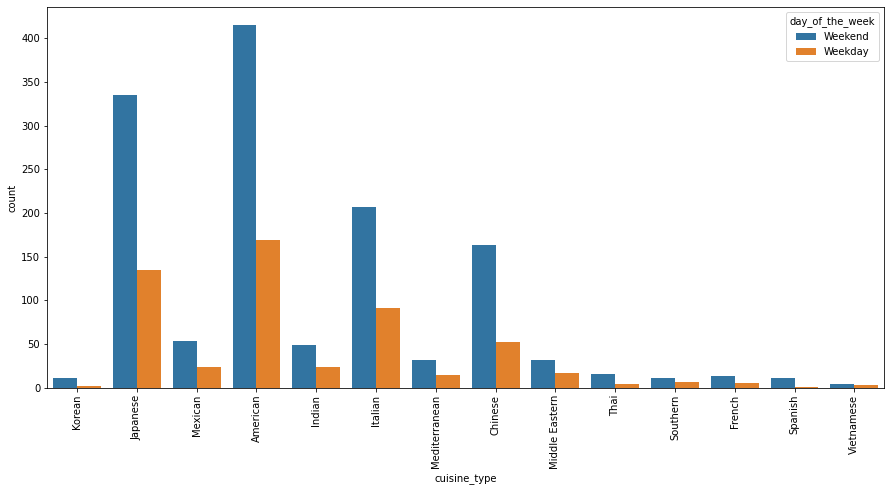

In [211]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='cuisine_type',hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show();

Observations on Orders per cuisine per day of the week :

1. On both Weekdays and Weekends, the popularity of the cuisines remain more or less the same, however, the number of orders on weekends appear to be lesser. Subsequenlty, deliveries are also lower. 
2. This could possibly mean, that during the weekends, working professionals and students are unavailable during the weekends within the city. 

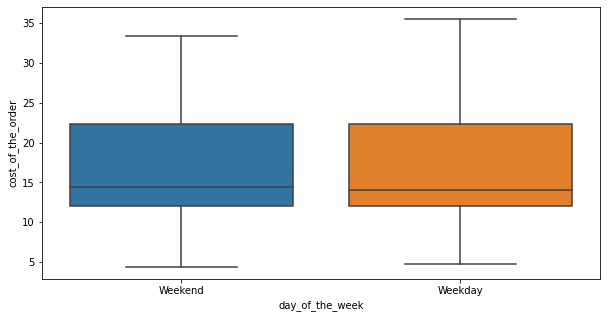

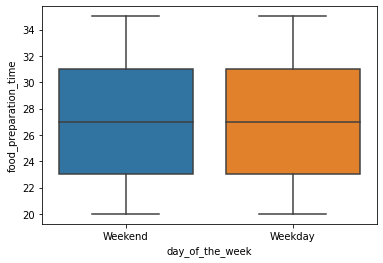

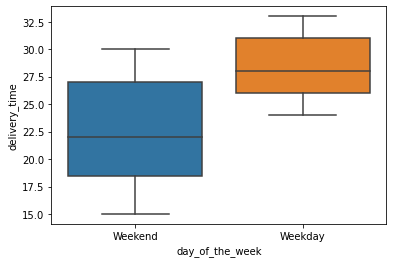

In [212]:
# Relationship following the day of the week with delivery cost of the order, food preparation time and delivery time
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='day_of_the_week',y='cost_of_the_order') 
plt.show()
sns.boxplot(data=df,x='day_of_the_week',y='food_preparation_time') 
plt.show()
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data=df)  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()


Observations on Day of the week and other variables:
1. Food Preparation times and Cost of the orders remain almost the same regardless of Weekdays or Weekends. 
2. However, Delivery times during weekends is generally lesser. 

**Cuisine Vs Cost of order**

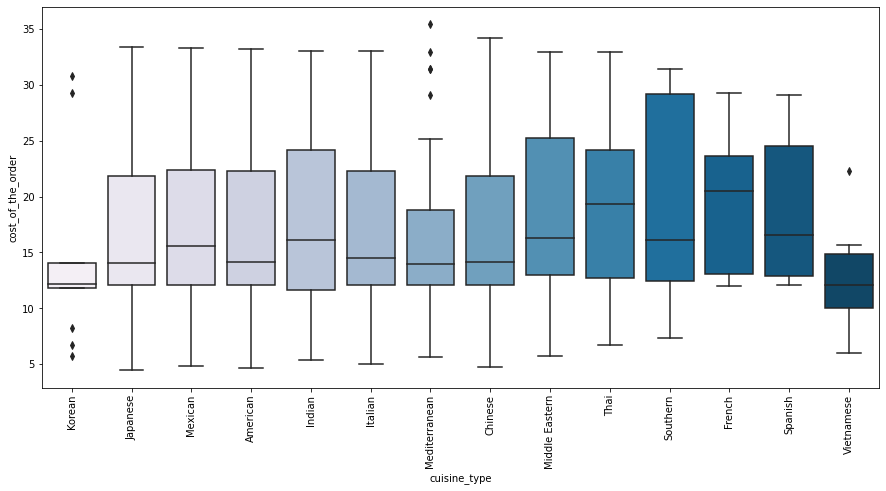

In [213]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 90)
plt.show()

#### Observations:
Cost of food and Cusiine Type: 
1. French Cuisine has the highest average cost of food; followed by Thai. 
2. Outliers are evident in Korean, Meditarranean and Viatnamese cuisine types. 

**Cuisine Vs food Prep time**

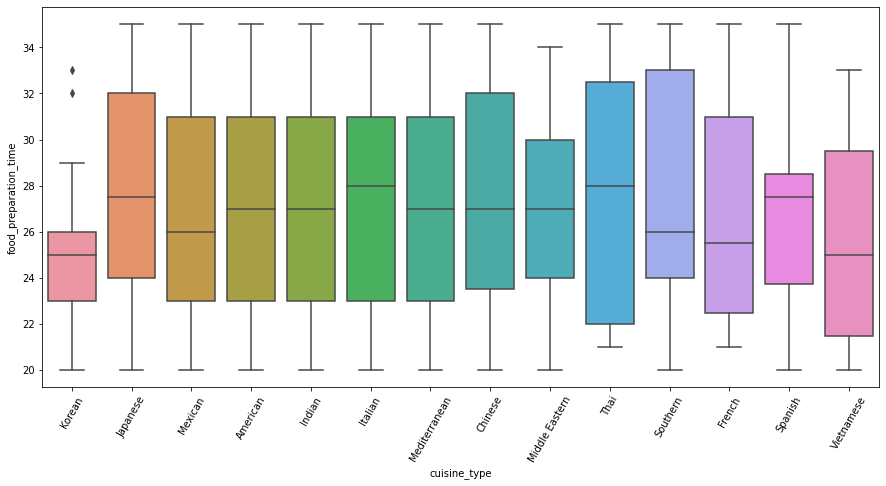

In [214]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data=df)  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()

Observations of Food Preparation time, by cuisine:
1. Thai and Italian seem to have the highest average preparation times. 

In [215]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)


restaurant_name
Shake Shack                     3579.53
The Meatball Shop               2145.21
Blue Ribbon Sushi               1903.95
Blue Ribbon Fried Chicken       1662.29
Parm                            1112.76
RedFarm Broadway                 965.13
RedFarm Hudson                   921.21
TAO                              834.50
Han Dynasty                      755.29
Blue Ribbon Sushi Bar & Grill    666.62
Rubirosa                         660.45
Sushi of Gari 46                 640.87
Nobu Next Door                   623.67
Five Guys Burgers and Fries      506.47
Name: cost_of_the_order, dtype: float64

Rating vs delivery time


Rating vs food orders

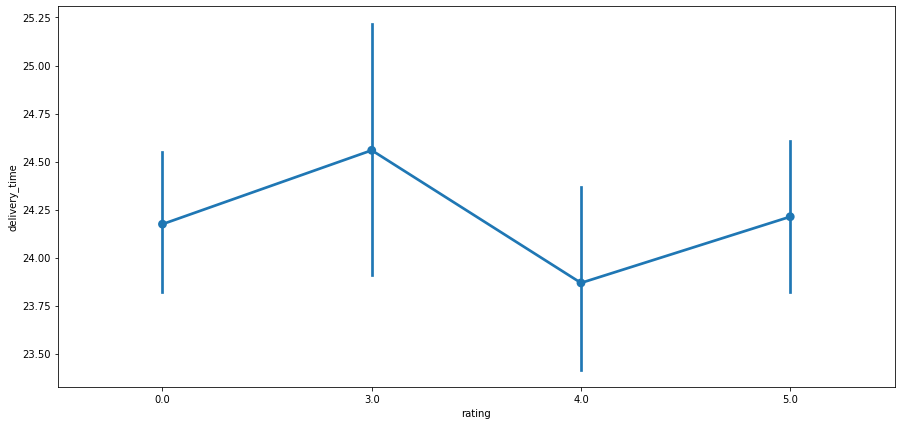

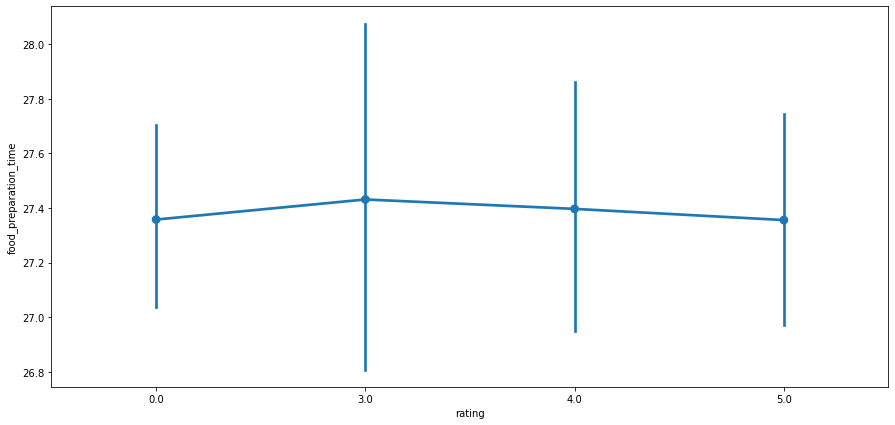

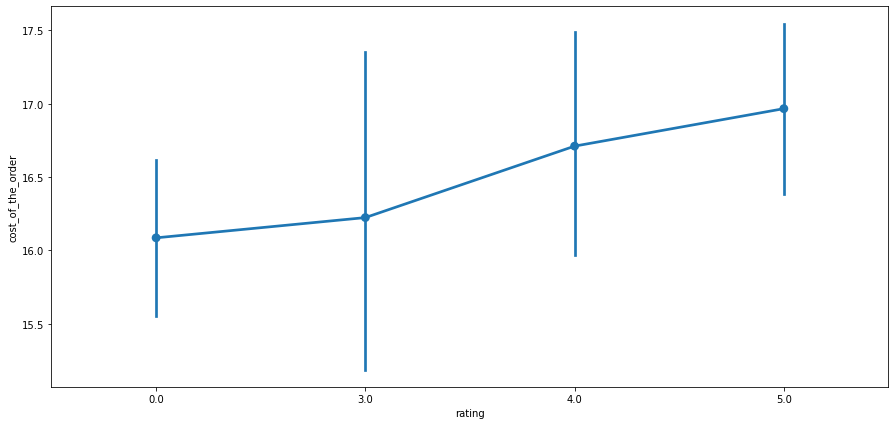

In [216]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()
#Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)   ## Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

**Observations on Rating **
1. With an increase in delivery time, the rating was lesser. 
2. Food Preparation time has not much of an effect on the rating. 
3. The higher the cost of the order, the higher the rating appeared. 

Correlation 


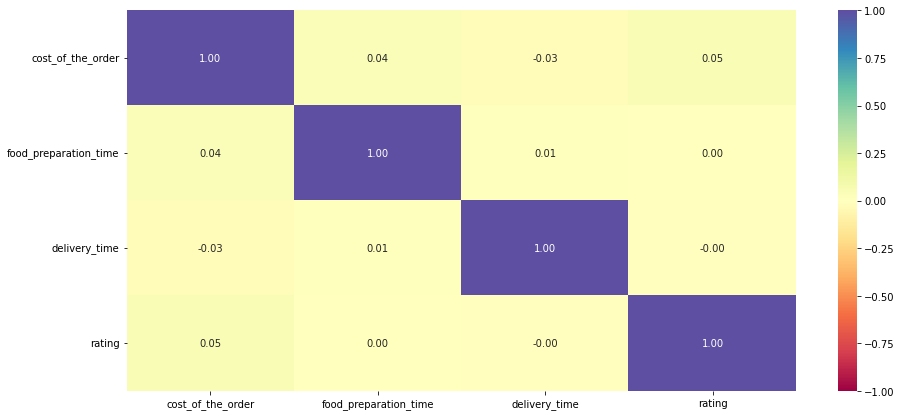

In [217]:
 ##Plotting the categorical heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time','rating']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations on the Heatmap**

No strong Correlation can be seen between the variables. 

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [218]:


# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head(10) 

,restaurant_name,rating
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68
5,RedFarm Broadway,59
6,RedFarm Hudson,55
7,TAO,49
8,Han Dynasty,46
9,Blue Ribbon Sushi Bar & Grill,44


In [219]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count['rating']>50 ## Complete the code to get the restaurant names having rating count more than 50
rest_names.head(15)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
Name: rating, dtype: bool

In [220]:
#Dataframe of Restaurants where mean rating> 4. eliminates unrated rows

resto_mean_g4 = df[['restaurant_name','rating']][df['rating']!= 0].groupby('restaurant_name').mean()> 4  
resto_mean_g4.reset_index(inplace=True) #index reset
#Dataframe of Restaurants where mean rating> 50. Unrated rows not accounted.
# Create a data set of Restaurants with a consideration of count of rating greate than 50.Equally in this case unrated orders are not considered.
resto_count_g50 = df[['restaurant_name','rating']][df['rating']!= 0].groupby('restaurant_name').count()> 50
resto_count_g50.reset_index(inplace=True)##Index Reset
# Create a set of Restaurants that meet both conditions using merge
qualified_restaurants = pd.merge(resto_count_g50[resto_count_g50['rating']== True], resto_mean_g4[resto_mean_g4['rating']== True],on ='restaurant_name')
# Return the set of qualified restaurants only
qualified_restaurants

,restaurant_name,rating_x,rating_y
0,Blue Ribbon Fried Chicken,True,True
1,Blue Ribbon Sushi,True,True
2,Shake Shack,True,True
3,The Meatball Shop,True,True


**Observations**

The following Restaurants qualify for the promotional offer: 
1. Blue Ribbon Fried Chicken
2. Blue Ribbon Sushi
3. Shake Shack 
4. The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [226]:
# Write the code here

def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,0.00,25,20,7.69,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,0.00,25,23,1.81,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.00,23,28,1.83,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.00,25,15,7.30,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.00,25,24,1.74,49


In [227]:
# get the total revenue and print it
total_rev = df['Revenue'].sum() ## Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'US Dollars')

The net revenue is around 6166.3 US Dollars


Net Revenue generated is 6166.30 USD. 

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [223]:
# Write the code here
# Create new column => Total Time 
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

#%
df_greater_than_60percent = df[df['total_time']>60]

##Calculate percentage of such orders in the dataset
greater_than_60percent = (df_greater_than_60percent.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 60 minutes:", round(greater_than_60percent, 2), '%.')


Percentage of orders above 60 minutes: 10.54 %.


In [224]:
#%
rating2 = df[df['total_time']==0]

##Calculate percentage of such orders in the dataset
rating2percent = (rating2.shape[0] / df.shape[0]) * 100
rating2percent

0.0

#### Observations:
About 10.54% of orders take longer than 60 minutes in total (preparation plus delivery).

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [225]:
# Write the code here
mean_del_time=df.groupby('day_of_the_week')[['delivery_time']].mean()
mean_del_time


,delivery_time
day_of_the_week,
Weekday,28.34
Weekend,22.47


Observations
1. The mean delivery time on Weekdays is around 28 minutes
2. The mean delivery time on Weekends is around 22 minutes

As noted before, fewer orders are received on weekends and as a result the delivery time could be a consequence of that. With higher traffic conditions on weekdays. 

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* Food costs appear to be bimodal with twin peaks. One at 13 Dollars and another slightly lower volumen at 25 Dollars. 

* Most orders have a high rating of 5, but the unavailability of ratings (736 orders out of 1898 entries) leaves room for further introspection. 
* Food Preparation times and Cost of the orders remain almost the same regardless of Weekdays or Weekends.
However, Delivery times during weekends is generally lesser, prompting the possibility that the target crowd either move cities or cook at home. 
* Most cusines are consistently favoured, regardless of it being a Weekday or a Weekend. 


### Recommendations:

*  Food costs appear to be bimodal with twin peaks. One at 13 Dollars and another slightly lower volumes at 25 Dollars. This could discern 2 different groups, one that are possibly students and another that are comparitively more affluent. 

* We might need to better understand the demographics of the target group, such as their nationalities. Marketing efforts could be probed based on further information gathering for the less popular cuisine types that receive lesser orders. 

* Need more insights on the impact of other factors such as traffic, that increases delivery times. Based on further insights, logistics might need to be set in place to improve efficiency on the total order times. 

* Additional offers, such as promotions and coupons could drive sales of the restaurants. 

* Improve feedback collection responses, which will allow better records of ratings for the restaurants thereby enabling service improvements based on customer satisfactions.

---